In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv("../data/raw/sales_data.csv")
df.head()

,TransactionID,Date,StoreID,ProductID,Quantity,Price,TotalAmount
0,1,2023-02-18,104,204,3,250,750
1,2,2023-04-04,103,203,4,100,400
2,3,2023-01-12,102,202,4,150,600
3,4,2023-05-30,102,205,4,100,400
4,5,2023-03-26,103,201,5,200,1000


In [2]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df['Quantity'] = df['Quantity'].astype(int)
df['Price'] = df['Price'].astype(float)
df['TotalAmount'] = df['Quantity'] * df['Price']

df.to_csv("../data/processed/sales_data_cleaned.csv", index=False)
df.head()

,TransactionID,Date,StoreID,ProductID,Quantity,Price,TotalAmount
0,1,2023-02-18,104,204,3,250.0,750.0
1,2,2023-04-04,103,203,4,100.0,400.0
2,3,2023-01-12,102,202,4,150.0,600.0
3,4,2023-05-30,102,205,4,100.0,400.0
4,5,2023-03-26,103,201,5,200.0,1000.0


In [3]:

daily_sales = df.groupby("Date")["TotalAmount"].sum().reset_index()

product_sales = df.groupby("ProductID")["TotalAmount"].sum().reset_index()

store_sales = df.groupby("StoreID")["TotalAmount"].sum().reset_index()

avg_order_value = df["TotalAmount"].mean()
total_revenue = df["TotalAmount"].sum()
unique_transactions = df["TransactionID"].nunique()

print("KPI Report:")
print(f"Total Revenue: {total_revenue}")
print(f"Average Order Value: {avg_order_value}")
print(f"Unique Transactions: {unique_transactions}")

KPI Report:
Total Revenue: 453050.0
Average Order Value: 453.05
Unique Transactions: 1000


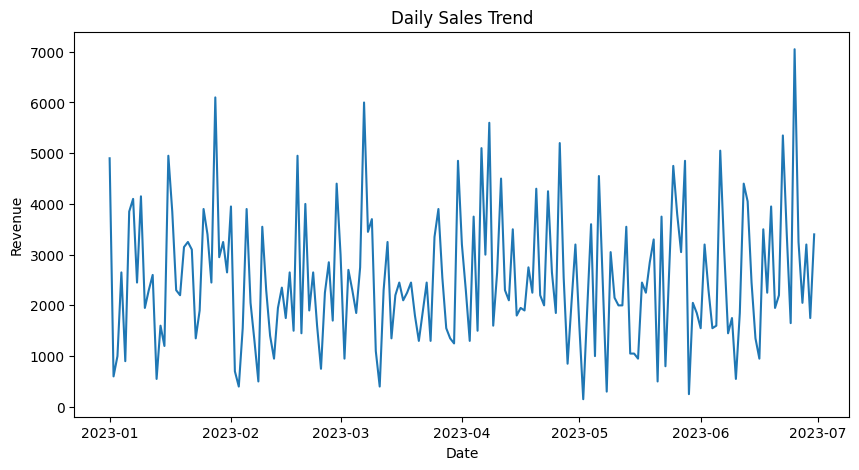

In [4]:
plt.figure(figsize=(10,5))
plt.plot(daily_sales["Date"], daily_sales["TotalAmount"])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

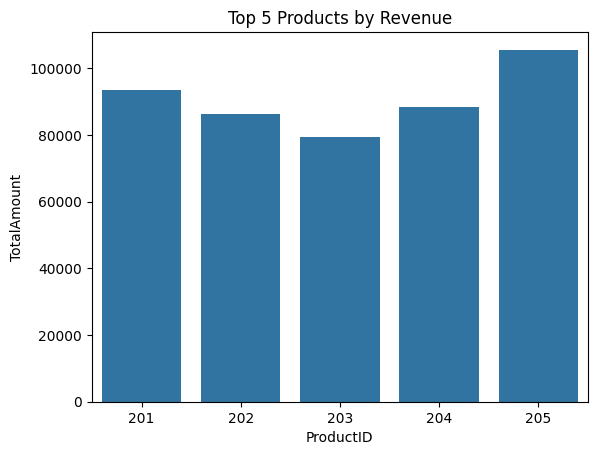

In [5]:
top_products = product_sales.sort_values(by="TotalAmount", ascending=False).head(5)
sns.barplot(x="ProductID", y="TotalAmount", data=top_products)
plt.title("Top 5 Products by Revenue")
plt.show()

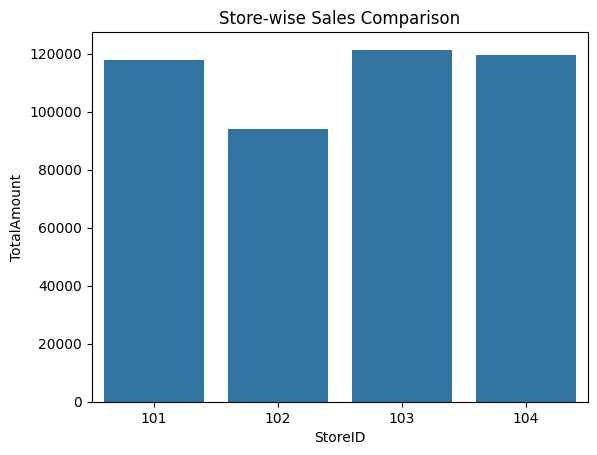

In [6]:
sns.barplot(x="StoreID", y="TotalAmount", data=store_sales)
plt.title("Store-wise Sales Comparison")
plt.show()